In [42]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import pearsonr

In [43]:
bdi_data=pd.read_csv('Baltic Dry Index Historical Data.csv', parse_dates = ['Date'],index_col = ['Date'])
bci_data=pd.read_csv('Baltic Capesize Historical Data.csv', parse_dates = ['Date'],index_col = ['Date'])
bpi_data=pd.read_csv('Baltic Panamax Historical Data.csv', parse_dates = ['Date'],index_col = ['Date'])
bsi_data=pd.read_csv('Baltic Supramax Historical Data.csv', parse_dates = ['Date'],index_col = ['Date'])
brent_oil_data=pd.read_csv('Brent Oil Futures Historical Data.csv', parse_dates = ['Date'],index_col = ['Date'])
crude_oil_data=pd.read_csv('Crude Oil WTI Futures Historical Data.csv', parse_dates = ['Date'],index_col = ['Date'])
steel_data=pd.read_csv('STEEL HRC FOB CHINA Futures Historical Data.csv', parse_dates = ['Date'],index_col = ['Date'])
usd_jpy_data=pd.read_csv('USD_JPY Historical Data.csv', parse_dates = ['Date'],index_col = ['Date'])
dow_jones_index_data=pd.read_csv('Simple-X NY Dow Jones Index ETF (1679).csv', parse_dates = ['Date'],index_col = ['Date'])
#df=pd.concat([bdi_data,oil_data],axis=1).dropna()
#df.columns=['bdi','oil']

### statistiques descriptives 

In [44]:
bdi_data.describe()

,BDI
count,3588.000000
mean,1288.469064
std,772.982162
min,290.000000
25%,777.750000
50%,1093.000000
75%,1512.250000
max,5650.000000


In [45]:
bsi_data.describe()

,bsi
count,3588.00000
mean,1049.17677
std,625.24935
min,243.00000
25%,711.00000
50%,895.50000
75%,1061.00000
max,3624.00000


In [46]:
bci_data.describe()

,bci
count,3588.000000
mean,1970.318980
std,1310.387516
min,-372.000000
25%,1170.750000
50%,1760.000000
75%,2519.875000
max,10485.000000


In [47]:
bpi_data.describe()

,bpi
count,3588.000000
mean,1318.610368
std,777.884219
min,282.000000
25%,799.000000
50%,1130.000000
75%,1528.000000
max,4328.000000


In [48]:
steel_data.describe()

,steelHRC
count,1146.000000
mean,629.139476
std,184.448317
min,378.000000
25%,471.250000
50%,528.500000
75%,800.312500
max,1025.000000


In [49]:
dow_jones_index_data.describe()

,dow_jones_index
count,3588.000000
mean,22083.165412
std,6484.675186
min,9450.000000
25%,17450.000000
50%,21635.000000
75%,25892.500000
max,39110.000000


In [50]:
brent_oil_data.describe()

,brent_oil
count,3588.000000
mean,71.120655
std,24.644903
min,19.330000
25%,51.657500
50%,64.967500
75%,93.450000
max,127.980000


In [51]:
crude_oil_data.describe()

,crude_oil
count,3588.000000
mean,65.103550
std,22.085349
min,-37.630000
25%,48.392500
50%,59.220000
75%,85.945000
max,123.700000


In [52]:
usd_jpy_data.describe()

,usd_jpy
count,3588.000000
mean,107.922692
std,9.354530
min,77.490000
25%,103.927500
50%,109.190000
75%,113.008750
max,130.790000


### bdi et bci

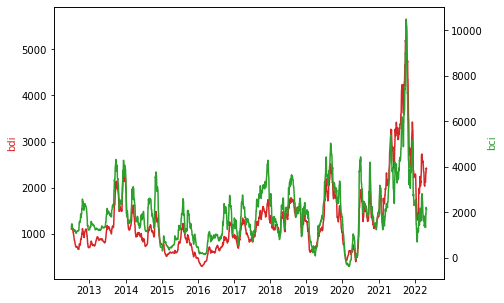

In [53]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('bci', color = color)  
ax2.plot(bci_data.bci, color = color)  
plt.show()

In [54]:
result=adfuller(bdi_data['BDI'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-2.437065154295423
p-value:0.13154708852916003
valeurs critiques:
	 1% : -3.4321892422972575
	 5% : -2.8623526737372837
	 10% : -2.5672025996313876


In [55]:
bdi_data_diff=bdi_data.diff().dropna()

In [56]:
result=adfuller(bci_data['bci'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-4.293399976978173
p-value:0.0004560489030659468
valeurs critiques:
	 1% : -3.4321892422972575
	 5% : -2.8623526737372837
	 10% : -2.5672025996313876


In [57]:
#meme si la serie du bci est stationnaire, on va la differencier pour avoir une bonne corrélation avec la série du bdi qui n'est pas stationnaire et qu'on a différencié, on effet, la corrélation entre la serie du bdi différenciée et la serie du bci originale n'est pas significative(<0.05)
bci_data_diff=bci_data.diff().dropna()

In [58]:
result=adfuller(bci_data_diff['bci'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-12.217658739813627
p-value:1.1259406015971862e-22
valeurs critiques:
	 1% : -3.4321892422972575
	 5% : -2.8623526737372837
	 10% : -2.5672025996313876


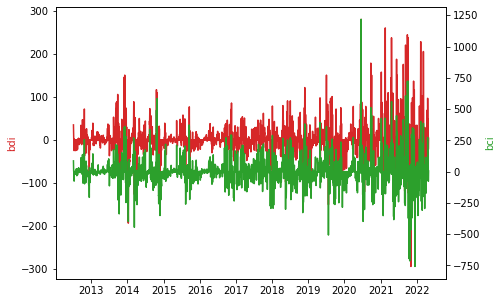

In [59]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data_diff.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('bci', color = color)  
ax2.plot(bci_data_diff.bci, color = color)  
plt.show()

In [60]:
l=pd.DataFrame(columns=['correlation'])
for lag in range(1, 100):
    bdi_series = bdi_data_diff['BDI'].iloc[lag:]
    lagged_series = bci_data_diff['bci'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(bdi_series, lagged_series))
    if(pearsonr(bdi_series, lagged_series)[1]<0.05):
        l=l.append(pd.DataFrame([np.abs(pearsonr(bdi_series, lagged_series)[0])], columns=['correlation'], index=[lag]))
    print('------')

Lag: 1
(0.5522882171184402, 1.5635464826115195e-285)
------
Lag: 2
(0.22099896543986983, 6.59036568694386e-41)
------
Lag: 3
(0.15933628566721236, 8.234353282106689e-22)
------
Lag: 4
(0.16684721039111072, 8.800313390720496e-24)
------
Lag: 5
(0.15558733278526468, 7.554120474245255e-21)
------
Lag: 6
(0.1658578307093145, 1.6692255027309894e-23)
------
Lag: 7
(0.16431281781645835, 4.365748141856913e-23)
------
Lag: 8
(0.13739356262143373, 1.5083443346754492e-16)
------
Lag: 9
(0.06273350214160428, 0.00017342534279995541)
------
Lag: 10
(0.045665102447949114, 0.006302569032584075)
------
Lag: 11
(0.08526230863048992, 3.287452315043981e-07)
------
Lag: 12
(0.10579969831072991, 2.2754704913227158e-10)
------
Lag: 13
(0.09704042628479143, 6.13425407327827e-09)
------
Lag: 14
(0.07273094482938768, 1.3508344120644129e-05)
------
Lag: 15
(0.021891501360139388, 0.1908492599063619)
------
Lag: 16
(-0.032286919796234353, 0.053703034902741247)
------
Lag: 17
(-0.02792040652791808, 0.09532155785227

In [61]:
l['lags']=l.index
l.sort_values(by=['correlation'], ascending=False)

,correlation,lags
1,0.552288,1
2,0.220999,2
4,0.166847,4
6,0.165858,6
7,0.164313,7
3,0.159336,3
5,0.155587,5
35,0.153849,35
8,0.137394,8
34,0.116546,34


In [62]:
df=pd.concat([bdi_data_diff,bci_data_diff],axis=1).dropna()
df.columns=['bdi','bci']

In [63]:
results=grangercausalitytests(df[['bdi','bci']], 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.8528 , p=0.0003  , df_denom=3583, df_num=1
ssr based chi2 test:   chi2=12.8635 , p=0.0003  , df=1
likelihood ratio test: chi2=12.8405 , p=0.0003  , df=1
parameter F test:         F=12.8528 , p=0.0003  , df_denom=3583, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=22.6660 , p=0.0000  , df_denom=3580, df_num=2
ssr based chi2 test:   chi2=45.3953 , p=0.0000  , df=2
likelihood ratio test: chi2=45.1103 , p=0.0000  , df=2
parameter F test:         F=22.6660 , p=0.0000  , df_denom=3580, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.3992 , p=0.0000  , df_denom=3577, df_num=3
ssr based chi2 test:   chi2=58.3114 , p=0.0000  , df=3
likelihood ratio test: chi2=57.8421 , p=0.0000  , df=3
parameter F test:         F=19.3992 , p=0.0000  , df_denom=3577, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=15.7747 , p=0.

### bdi et bsi

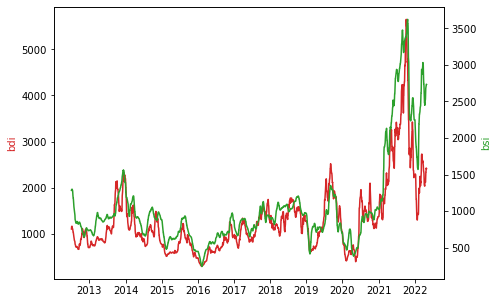

In [64]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('bsi', color = color)  
ax2.plot(bsi_data.bsi, color = color)  
plt.show()

In [65]:
result=adfuller(bsi_data['bsi'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-0.9398048120629968
p-value:0.7745817522101313
valeurs critiques:
	 1% : -3.4321892422972575
	 5% : -2.8623526737372837
	 10% : -2.5672025996313876


In [66]:
bsi_data_diff=bsi_data.diff().dropna()

In [67]:
result=adfuller(bsi_data_diff['bsi'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-10.961859602360882
p-value:8.287664923314305e-20
valeurs critiques:
	 1% : -3.4321892422972575
	 5% : -2.8623526737372837
	 10% : -2.5672025996313876


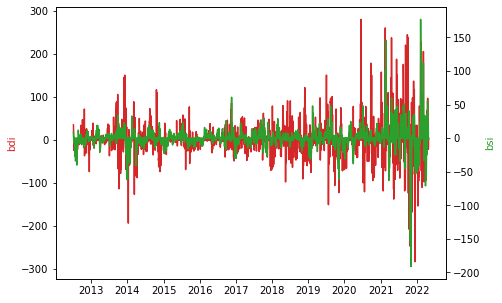

In [68]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data_diff.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('bsi', color = color)  
ax2.plot(bsi_data_diff.bsi, color = color)  
plt.show()

In [69]:
l=pd.DataFrame(columns=['correlation'])
for lag in range(1, 100):
    bdi_series = bdi_data_diff['BDI'].iloc[lag:]
    lagged_series = bsi_data_diff['bsi'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(bdi_series, lagged_series))
    if(pearsonr(bdi_series, lagged_series)[1]<0.05):
        l=l.append(pd.DataFrame([np.abs(pearsonr(bdi_series, lagged_series)[0])], columns=['correlation'], index=[lag]))
    print('------')

l['lags']=l.index
l.sort_values(by=['correlation'], ascending=False)

Lag: 1
(0.2989774680147288, 5.938331366226452e-75)
------
Lag: 2
(0.15886367711637508, 1.0747123951572884e-21)
------
Lag: 3
(0.09976348573694561, 2.159308240718634e-09)
------
Lag: 4
(0.11436416705704236, 6.61302779213634e-12)
------
Lag: 5
(0.15685581988365283, 3.621800982789346e-21)
------
Lag: 6
(0.1707386386618353, 7.873111112392855e-25)
------
Lag: 7
(0.1377579532526132, 1.2410304059878727e-16)
------
Lag: 8
(0.09256410876992904, 2.8961260097900466e-08)
------
Lag: 9
(0.041120141903627755, 0.013899928425759461)
------
Lag: 10
(0.023998361027467864, 0.15128721003041476)
------
Lag: 11
(0.03662359544297966, 0.028520773003916547)
------
Lag: 12
(0.03386688503652802, 0.042886068439867885)
------
Lag: 13
(0.010808936165589188, 0.5182904823085626)
------
Lag: 14
(-0.01575809161602728, 0.34636564844346795)
------
Lag: 15
(-0.037758953158039725, 0.02402529821887534)
------
Lag: 16
(-0.04636676577210263, 0.005583323429498421)
------
Lag: 17
(-0.035237908233756776, 0.03525971484716172)
---

,correlation,lags
1,0.298977,1
6,0.170739,6
2,0.158864,2
5,0.156856,5
7,0.137758,7
49,0.116840,49
48,0.115568,48
4,0.114364,4
3,0.099763,3
50,0.098178,50


In [70]:
df=pd.concat([bdi_data_diff,bsi_data_diff],axis=1).dropna()
df.columns=['bdi','bsi']

results=grangercausalitytests(df[['bdi','bsi']], 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3468  , p=0.0208  , df_denom=3583, df_num=1
ssr based chi2 test:   chi2=5.3513  , p=0.0207  , df=1
likelihood ratio test: chi2=5.3473  , p=0.0208  , df=1
parameter F test:         F=5.3468  , p=0.0208  , df_denom=3583, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=19.8465 , p=0.0000  , df_denom=3580, df_num=2
ssr based chi2 test:   chi2=39.7485 , p=0.0000  , df=2
likelihood ratio test: chi2=39.5297 , p=0.0000  , df=2
parameter F test:         F=19.8465 , p=0.0000  , df_denom=3580, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=18.1447 , p=0.0000  , df_denom=3577, df_num=3
ssr based chi2 test:   chi2=54.5407 , p=0.0000  , df=3
likelihood ratio test: chi2=54.1298 , p=0.0000  , df=3
parameter F test:         F=18.1447 , p=0.0000  , df_denom=3577, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.8490 , p=0.

### bdi et bpi

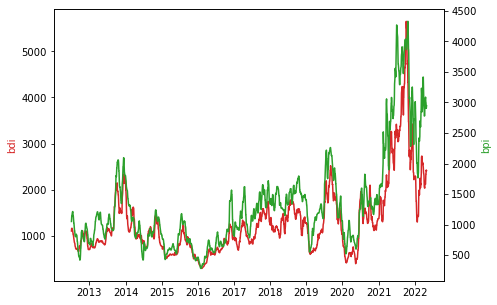

In [71]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('bpi', color = color)  
ax2.plot(bpi_data.bpi, color = color)  
plt.show()

In [72]:
result=adfuller(bpi_data['bpi'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))



statistiques ADf:-1.685741545792965
p-value:0.4384734289721357
valeurs critiques:
	 1% : -3.432188208268577
	 5% : -2.8623522169902156
	 10% : -2.567202356473299


In [73]:
bpi_data_diff=bpi_data.diff().dropna()

result=adfuller(bpi_data_diff['bpi'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))


statistiques ADf:-12.406963396477217
p-value:4.430324636342488e-23
valeurs critiques:
	 1% : -3.432188208268577
	 5% : -2.8623522169902156
	 10% : -2.567202356473299


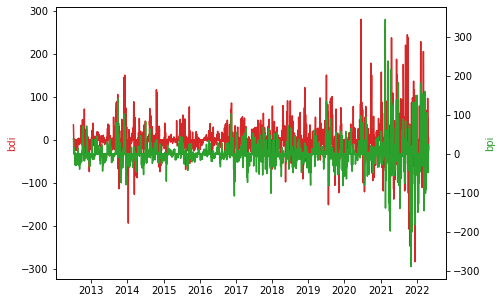

In [74]:

fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data_diff.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('bpi', color = color)  
ax2.plot(bpi_data_diff.bpi, color = color)  
plt.show()



In [75]:
l=pd.DataFrame(columns=['correlation'])
for lag in range(1, 100):
    bdi_series = bdi_data_diff['BDI'].iloc[lag:]
    lagged_series = bpi_data_diff['bpi'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(bdi_series, lagged_series))
    if(pearsonr(bdi_series, lagged_series)[1]<0.05):
        l=l.append(pd.DataFrame([np.abs(pearsonr(bdi_series, lagged_series)[0])], columns=['correlation'], index=[lag]))
    print('------')

l['lags']=l.index
l.sort_values(by=['correlation'], ascending=False)



Lag: 1
(0.39784334331756865, 2.663286517682684e-136)
------
Lag: 2
(0.1815209905346383, 6.226376812320366e-28)
------
Lag: 3
(0.10594590080615143, 2.0399725385971347e-10)
------
Lag: 4
(0.13360509037809276, 9.700380888076159e-16)
------
Lag: 5
(0.1612731306473644, 2.6687640908175884e-22)
------
Lag: 6
(0.1458262900303947, 1.7814233730275076e-18)
------
Lag: 7
(0.09443097479626661, 1.5068842465744123e-08)
------
Lag: 8
(0.04375671489715944, 0.008842768944206478)
------
Lag: 9
(0.008421566712545231, 0.6145561310358288)
------
Lag: 10
(0.003859718305524734, 0.817499462315667)
------
Lag: 11
(0.002585853769671429, 0.8771529207460228)
------
Lag: 12
(-0.011202001919278613, 0.5031325314422711)
------
Lag: 13
(-0.0335067808550058, 0.045177763077970196)
------
Lag: 14
(-0.05853157724593484, 0.00046442592532468626)
------
Lag: 15
(-0.08567047851454204, 2.930898208987464e-07)
------
Lag: 16
(-0.08400605876688487, 4.978197945977398e-07)
------
Lag: 17
(-0.06697829452750811, 6.201372383401015e-05)

,correlation,lags
1,0.397843,1
2,0.181521,2
5,0.161273,5
6,0.145826,6
21,0.137467,21
20,0.135368,20
4,0.133605,4
49,0.112311,49
22,0.112279,22
3,0.105946,3


In [76]:
df=pd.concat([bdi_data_diff,bpi_data_diff],axis=1).dropna()
df.columns=['bdi','bpi']

results=grangercausalitytests(df[['bdi','bpi']], 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.9183 , p=0.0000  , df_denom=3583, df_num=1
ssr based chi2 test:   chi2=16.9325 , p=0.0000  , df=1
likelihood ratio test: chi2=16.8926 , p=0.0000  , df=1
parameter F test:         F=16.9183 , p=0.0000  , df_denom=3583, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.3266 , p=0.0000  , df_denom=3580, df_num=2
ssr based chi2 test:   chi2=66.7462 , p=0.0000  , df=2
likelihood ratio test: chi2=66.1325 , p=0.0000  , df=2
parameter F test:         F=33.3266 , p=0.0000  , df_denom=3580, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=33.6875 , p=0.0000  , df_denom=3577, df_num=3
ssr based chi2 test:   chi2=101.2603, p=0.0000  , df=3
likelihood ratio test: chi2=99.8563 , p=0.0000  , df=3
parameter F test:         F=33.6875 , p=0.0000  , df_denom=3577, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=25.8680 , p=0.

### bdi et brent oil

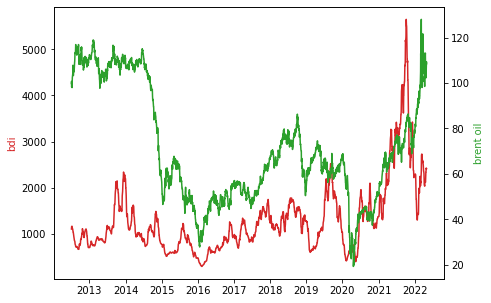

In [77]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('brent oil', color = color)  
ax2.plot(brent_oil_data.brent_oil, color = color)  
plt.show()

In [78]:
result=adfuller(brent_oil_data['brent_oil'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))



statistiques ADf:-1.1940222401004001
p-value:0.6761618924930606
valeurs critiques:
	 1% : -3.432178442676204
	 5% : -2.8623479033634767
	 10% : -2.5672000600324405


In [79]:
brent_oil_data_diff=brent_oil_data.diff().dropna()
result=adfuller(brent_oil_data_diff['brent_oil'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-22.135403031881925
p-value:0.0
valeurs critiques:
	 1% : -3.432178442676204
	 5% : -2.8623479033634767
	 10% : -2.5672000600324405


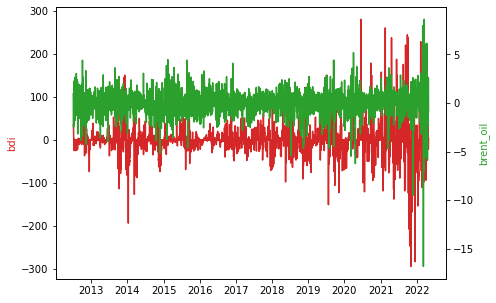

In [80]:

fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data_diff.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('brent_oil', color = color)  
ax2.plot(brent_oil_data_diff.brent_oil, color = color)  
plt.show()



In [81]:
l=pd.DataFrame(columns=['correlation'])
for lag in range(1, 100):
    bdi_series = bdi_data_diff['BDI'].iloc[lag:]
    lagged_series = brent_oil_data_diff['brent_oil'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(bdi_series, lagged_series))
    if(pearsonr(bdi_series, lagged_series)[1]<0.05):
        l=l.append(pd.DataFrame([np.abs(pearsonr(bdi_series, lagged_series)[0])], columns=['correlation'], index=[lag]))
    print('------')

l['lags']=l.index
l.sort_values(by=['correlation'], ascending=False)



Lag: 1
(0.01610466744688985, 0.3349829409826043)
------
Lag: 2
(0.023781974604312608, 0.15454857053827947)
------
Lag: 3
(-0.008759189136804553, 0.6001329789439501)
------
Lag: 4
(-0.0166161881930335, 0.3200592466457355)
------
Lag: 5
(0.019397155843135012, 0.24579641552169904)
------
Lag: 6
(0.029711269271383095, 0.0754470001714664)
------
Lag: 7
(0.027914481261514072, 0.09492883892372193)
------
Lag: 8
(0.028691611910019725, 0.08612140990300816)
------
Lag: 9
(0.017456450487196382, 0.2965332964520049)
------
Lag: 10
(-0.0019106392021462262, 0.9090541039262422)
------
Lag: 11
(-0.02912270929381669, 0.08163298018732618)
------
Lag: 12
(-0.013860559523436863, 0.4073925449678989)
------
Lag: 13
(0.011366140597034677, 0.49695694579074157)
------
Lag: 14
(0.014009793344357216, 0.4024927867948949)
------
Lag: 15
(0.007638619111971999, 0.6481180432784684)
------
Lag: 16
(-0.00655193995507193, 0.695503856175681)
------
Lag: 17
(-0.0004329850042323908, 0.9793677533140295)
------
Lag: 18
(0.008

,correlation,lags
55,0.045633,55
77,0.042066,77
56,0.039164,56
69,0.037969,69
49,0.036821,49
98,0.035894,98
50,0.035582,50
78,0.034922,78


In [82]:
df=pd.concat([bdi_data_diff,brent_oil_data_diff],axis=1).dropna()
df.columns=['bdi','brent_oil']

results=grangercausalitytests(df[['bdi','brent_oil']], 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1381  , p=0.7102  , df_denom=3583, df_num=1
ssr based chi2 test:   chi2=0.1383  , p=0.7100  , df=1
likelihood ratio test: chi2=0.1383  , p=0.7100  , df=1
parameter F test:         F=0.1381  , p=0.7102  , df_denom=3583, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7919  , p=0.4531  , df_denom=3580, df_num=2
ssr based chi2 test:   chi2=1.5859  , p=0.4525  , df=2
likelihood ratio test: chi2=1.5856  , p=0.4526  , df=2
parameter F test:         F=0.7919  , p=0.4531  , df_denom=3580, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8339  , p=0.1387  , df_denom=3577, df_num=3
ssr based chi2 test:   chi2=5.5124  , p=0.1379  , df=3
likelihood ratio test: chi2=5.5081  , p=0.1382  , df=3
parameter F test:         F=1.8339  , p=0.1387  , df_denom=3577, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3934  , p=0.

### bdi et crude oil

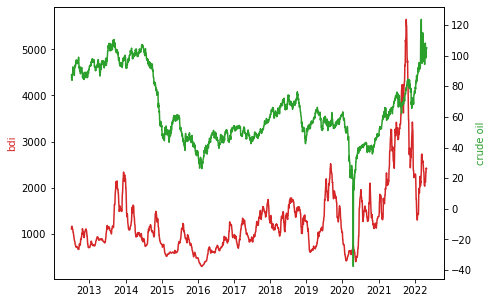

In [83]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('crude oil', color = color)  
ax2.plot(crude_oil_data.crude_oil, color = color)  
plt.show()

In [84]:
result=adfuller(crude_oil_data['crude_oil'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))



statistiques ADf:-1.5344160085099132
p-value:0.5164227751101571
valeurs critiques:
	 1% : -3.432186143695308
	 5% : -2.862351305034584
	 10% : -2.5672018709762545


In [85]:
crude_oil_data_diff=crude_oil_data.diff().dropna()
result=adfuller(crude_oil_data_diff['crude_oil'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))
    

statistiques ADf:-11.1480126289829
p-value:2.992161878759914e-20
valeurs critiques:
	 1% : -3.432186143695308
	 5% : -2.862351305034584
	 10% : -2.5672018709762545


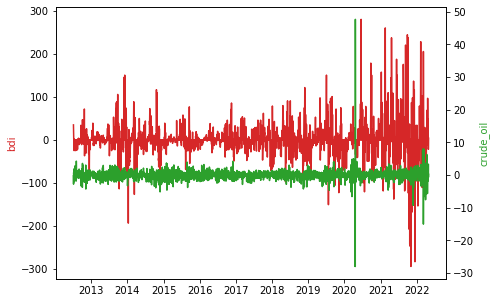

In [86]:

fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data_diff.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('crude_oil', color = color)  
ax2.plot(crude_oil_data_diff.crude_oil, color = color)  
plt.show()



In [87]:
l=pd.DataFrame(columns=['correlation'])
for lag in range(1, 100):
    bdi_series = bdi_data_diff['BDI'].iloc[lag:]
    lagged_series = crude_oil_data_diff['crude_oil'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(bdi_series, lagged_series))
    if(pearsonr(bdi_series, lagged_series)[1]<0.05):
        l=l.append(pd.DataFrame([np.abs(pearsonr(bdi_series, lagged_series)[0])], columns=['correlation'], index=[lag]))
    print('------')

l['lags']=l.index
l.sort_values(by=['correlation'], ascending=False)



Lag: 1
(0.007928171039617746, 0.6350675811618319)
------
Lag: 2
(0.017774672902553294, 0.2873426847955782)
------
Lag: 3
(0.004377751115498911, 0.7933287271223108)
------
Lag: 4
(-0.007037594724399726, 0.6736705699587382)
------
Lag: 5
(0.013971616641507107, 0.40318439593825856)
------
Lag: 6
(0.02464521760794703, 0.14034303725068686)
------
Lag: 7
(0.019434037110289702, 0.24503144324921675)
------
Lag: 8
(0.017425465254657428, 0.2973240761257677)
------
Lag: 9
(0.01649836831501787, 0.3238411831270001)
------
Lag: 10
(-0.005065029942270719, 0.762022842517412)
------
Lag: 11
(-0.019269284716486996, 0.24932071234838893)
------
Lag: 12
(-0.00923063791781357, 0.5811329271820935)
------
Lag: 13
(0.0002449745953436132, 0.9883192445267259)
------
Lag: 14
(0.0015065352532922286, 0.928270488617374)
------
Lag: 15
(-0.010363324237547433, 0.5358001120169552)
------
Lag: 16
(-0.006537446069716533, 0.6961438710981745)
------
Lag: 17
(-0.0015345683467064587, 0.9269700852795644)
------
Lag: 18
(0.008

,correlation,lags
57,0.070940,57
56,0.051913,56
58,0.046329,58
59,0.045390,59
50,0.039747,50
61,0.037600,61
84,0.034284,84
49,0.034259,49


In [88]:
df=pd.concat([bdi_data_diff,crude_oil_data_diff],axis=1).dropna()
df.columns=['bdi','crude_oil']

results=grangercausalitytests(df[['bdi','crude_oil']], 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3718  , p=0.5421  , df_denom=3583, df_num=1
ssr based chi2 test:   chi2=0.3721  , p=0.5419  , df=1
likelihood ratio test: chi2=0.3721  , p=0.5419  , df=1
parameter F test:         F=0.3718  , p=0.5421  , df_denom=3583, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7243  , p=0.4847  , df_denom=3580, df_num=2
ssr based chi2 test:   chi2=1.4507  , p=0.4842  , df=2
likelihood ratio test: chi2=1.4504  , p=0.4842  , df=2
parameter F test:         F=0.7243  , p=0.4847  , df_denom=3580, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4444  , p=0.7213  , df_denom=3577, df_num=3
ssr based chi2 test:   chi2=1.3358  , p=0.7207  , df=3
likelihood ratio test: chi2=1.3355  , p=0.7207  , df=3
parameter F test:         F=0.4444  , p=0.7213  , df_denom=3577, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4016  , p=0.

### bdi et steel

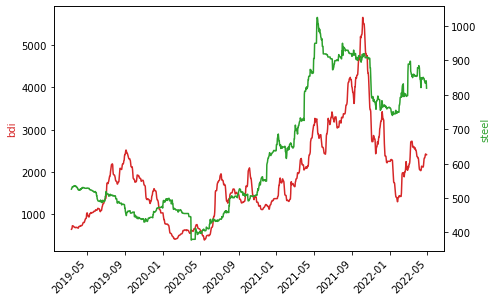

In [89]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data.BDI[-1146:], color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('steel', color = color)  
ax2.plot(steel_data.steelHRC, color = color)
fig.autofmt_xdate(rotation=45)

plt.show()

In [90]:
result=adfuller(steel_data['steelHRC'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))



statistiques ADf:-0.5439437065256885
p-value:0.883152197019643
valeurs critiques:
	 1% : -3.436089106551049
	 5% : -2.864074184091338
	 10% : -2.568119264202968


In [91]:
steel_data_diff=steel_data.diff().dropna()
result=adfuller(steel_data_diff['steelHRC'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))
    6.699e-30

statistiques ADf:-17.175576177448512
p-value:6.699086257760679e-30
valeurs critiques:
	 1% : -3.436089106551049
	 5% : -2.864074184091338
	 10% : -2.568119264202968


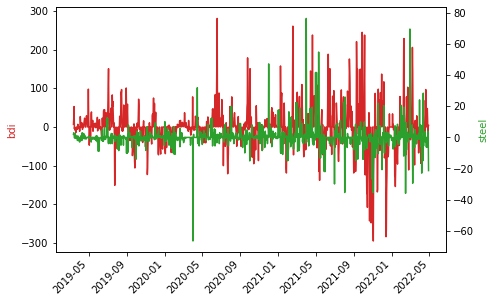

In [92]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data_diff.BDI[-1145:], color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('steel', color = color)  
ax2.plot(steel_data_diff.steelHRC, color = color)
fig.autofmt_xdate(rotation=45)

plt.show()

In [93]:
l=pd.DataFrame(columns=['correlation'])
for lag in range(1, 100):
    bdi_series = bdi_data_diff['BDI'][-1145:].iloc[lag:]
    lagged_series = steel_data_diff['steelHRC'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(bdi_series, lagged_series))
    if(pearsonr(bdi_series, lagged_series)[1]<0.05):
        l=l.append(pd.DataFrame([np.abs(pearsonr(bdi_series, lagged_series)[0])], columns=['correlation'], index=[lag]))
    print('------')

l['lags']=l.index
l.sort_values(by=['correlation'], ascending=False)



Lag: 1
(0.08244227188922297, 0.005268312955329934)
------
Lag: 2
(0.041838755891507644, 0.15748884820621484)
------
Lag: 3
(0.043077236416126756, 0.14572151007193926)
------
Lag: 4
(0.07116575206247885, 0.016203467992323802)
------
Lag: 5
(0.021032556551469662, 0.47805131116319466)
------
Lag: 6
(0.034399631140328776, 0.24603892171159786)
------
Lag: 7
(0.02288448486934634, 0.44056251905741645)
------
Lag: 8
(0.04670245482198157, 0.11550898640479387)
------
Lag: 9
(0.0263651662997807, 0.3746465205369506)
------
Lag: 10
(-0.0004865098335197716, 0.9869373456692238)
------
Lag: 11
(0.02022905933351146, 0.496168779903585)
------
Lag: 12
(0.043172457084721075, 0.14642910776528714)
------
Lag: 13
(0.03430005649615771, 0.24887063788685984)
------
Lag: 14
(0.03154182729826598, 0.28921138031443305)
------
Lag: 15
(0.01582330084676044, 0.5951746640871208)
------
Lag: 16
(0.012619981122670595, 0.6718677520798856)
------
Lag: 17
(-0.008413753709787274, 0.7777337314996815)
------
Lag: 18
(0.0271882

,correlation,lags
44,0.084664,44
1,0.082442,1
90,0.072856,90
4,0.071166,4
70,0.070900,70
24,0.068550,24
42,0.063478,42
23,0.062006,23
41,0.061348,41


In [94]:
df=pd.concat([bdi_data_diff[-1145:],steel_data_diff],axis=1).dropna()
df.columns=['bdi','steel']

results=grangercausalitytests(df[['bdi','steel']], 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9034  , p=0.0484  , df_denom=1141, df_num=1
ssr based chi2 test:   chi2=3.9136  , p=0.0479  , df=1
likelihood ratio test: chi2=3.9070  , p=0.0481  , df=1
parameter F test:         F=3.9034  , p=0.0484  , df_denom=1141, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7967  , p=0.1663  , df_denom=1138, df_num=2
ssr based chi2 test:   chi2=3.6091  , p=0.1645  , df=2
likelihood ratio test: chi2=3.6035  , p=0.1650  , df=2
parameter F test:         F=1.7967  , p=0.1663  , df_denom=1138, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7527  , p=0.1545  , df_denom=1135, df_num=3
ssr based chi2 test:   chi2=5.2904  , p=0.1517  , df=3
likelihood ratio test: chi2=5.2782  , p=0.1525  , df=3
parameter F test:         F=1.7527  , p=0.1545  , df_denom=1135, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8374  , p=0.

### bdi et usd_jpy

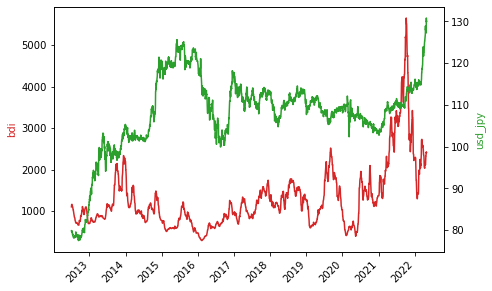

In [95]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('usd_jpy', color = color)  
ax2.plot(usd_jpy_data.usd_jpy, color = color)
fig.autofmt_xdate(rotation=45)

plt.show()

In [96]:
result=adfuller(usd_jpy_data['usd_jpy'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))



statistiques ADf:-2.141762059499994
p-value:0.22805666248113504
valeurs critiques:
	 1% : -3.4321779315711107
	 5% : -2.862347677599354
	 10% : -2.5671999398427015


In [97]:
usd_jpy_data_diff=usd_jpy_data.diff().dropna()
result=adfuller(usd_jpy_data_diff['usd_jpy'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-23.126870186329743
p-value:0.0
valeurs critiques:
	 1% : -3.4321779315711107
	 5% : -2.862347677599354
	 10% : -2.5671999398427015


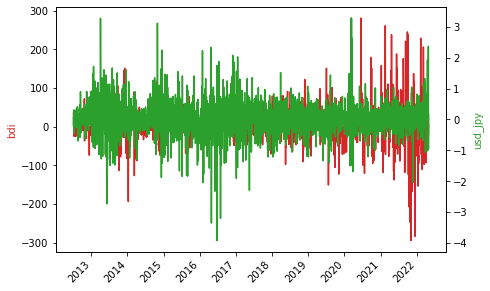

In [98]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data_diff.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('usd_jpy', color = color)  
ax2.plot(usd_jpy_data_diff.usd_jpy, color = color)
fig.autofmt_xdate(rotation=45)

plt.show()

In [99]:
l=pd.DataFrame(columns=['correlation'])
for lag in range(1, 100):
    bdi_series = bdi_data_diff['BDI'].iloc[lag:]
    lagged_series = usd_jpy_data_diff['usd_jpy'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(bdi_series, lagged_series))
    if(pearsonr(bdi_series, lagged_series)[1]<0.05):
        l=l.append(pd.DataFrame([np.abs(pearsonr(bdi_series, lagged_series)[0])], columns=['correlation'], index=[lag]))
    print('------')

l['lags']=l.index
l.sort_values(by=['correlation'], ascending=False)



Lag: 1
(0.005865274868635022, 0.7255042415587203)
------
Lag: 2
(0.003671993960098418, 0.8260392034858538)
------
Lag: 3
(0.007768899616862623, 0.6419731734471604)
------
Lag: 4
(-0.002756187358138676, 0.869004536237259)
------
Lag: 5
(0.014458007845112017, 0.3870101117325722)
------
Lag: 6
(0.003306769694450462, 0.8431910825678911)
------
Lag: 7
(-0.025715036945568738, 0.12396856828552469)
------
Lag: 8
(-0.028563687474221208, 0.08753119217714889)
------
Lag: 9
(-0.02009459525764285, 0.22948466623730468)
------
Lag: 10
(-0.03211273061911188, 0.05480448774787411)
------
Lag: 11
(-0.024364357486592967, 0.14520272291290054)
------
Lag: 12
(0.004785851035819167, 0.7748368840724105)
------
Lag: 13
(0.0004902223676180864, 0.9766279709151576)
------
Lag: 14
(-0.01472713768144974, 0.3788332428594432)
------
Lag: 15
(-0.030045639936840562, 0.07257552244351238)
------
Lag: 16
(-0.02022141788633596, 0.22701310326728005)
------
Lag: 17
(-0.01852787021512716, 0.2684072774178969)
------
Lag: 18
(-0

,correlation,lags


In [100]:
df=pd.concat([bdi_data_diff,usd_jpy_data_diff],axis=1).dropna()
df.columns=['bdi','usd_jpy']

results=grangercausalitytests(df[['bdi','usd_jpy']], 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0145  , p=0.9043  , df_denom=3583, df_num=1
ssr based chi2 test:   chi2=0.0145  , p=0.9042  , df=1
likelihood ratio test: chi2=0.0145  , p=0.9042  , df=1
parameter F test:         F=0.0145  , p=0.9043  , df_denom=3583, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0443  , p=0.9567  , df_denom=3580, df_num=2
ssr based chi2 test:   chi2=0.0887  , p=0.9566  , df=2
likelihood ratio test: chi2=0.0887  , p=0.9566  , df=2
parameter F test:         F=0.0443  , p=0.9567  , df_denom=3580, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0614  , p=0.9801  , df_denom=3577, df_num=3
ssr based chi2 test:   chi2=0.1846  , p=0.9800  , df=3
likelihood ratio test: chi2=0.1846  , p=0.9800  , df=3
parameter F test:         F=0.0614  , p=0.9801  , df_denom=3577, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1616  , p=0.

### bdi et dow jones index

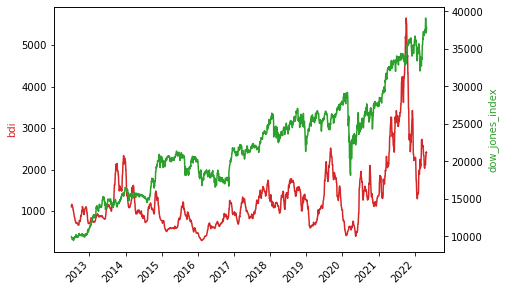

In [101]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('dow_jones_index', color = color)  
ax2.plot(dow_jones_index_data.dow_jones_index, color = color)
fig.autofmt_xdate(rotation=45)

plt.show()

In [102]:
result=adfuller(dow_jones_index_data['dow_jones_index'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))



statistiques ADf:-0.694925542661284
p-value:0.8480595618339137
valeurs critiques:
	 1% : -3.432184598306239
	 5% : -2.8623506224106547
	 10% : -2.5672015075684036


In [103]:
dow_jones_index_data_diff=dow_jones_index_data.diff().dropna()
result=adfuller(dow_jones_index_data_diff['dow_jones_index'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))
    1.194e-23

statistiques ADf:-12.679643443468152
p-value:1.1947041752488822e-23
valeurs critiques:
	 1% : -3.4321856282764167
	 5% : -2.8623510773655685
	 10% : -2.567201749772311


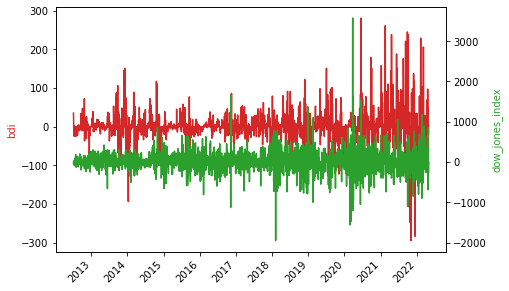

In [104]:
fig, ax1 = plt.subplots(figsize=(7, 5))  
fig = plt.figure(1, figsize=(20, 10)) 
color = 'tab:red'
ax1.set_ylabel('bdi', color = color)  
ax1.plot(bdi_data_diff.BDI, color = color)  
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('dow_jones_index', color = color)  
ax2.plot(dow_jones_index_data_diff.dow_jones_index, color = color)
fig.autofmt_xdate(rotation=45)

plt.show()

In [105]:
l=pd.DataFrame(columns=['correlation'])
for lag in range(1, 100):
    bdi_series = bdi_data_diff['BDI'].iloc[lag:]
    lagged_series = dow_jones_index_data_diff['dow_jones_index'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(bdi_series, lagged_series))
    if(pearsonr(bdi_series, lagged_series)[1]<0.05):
        l=l.append(pd.DataFrame([np.abs(pearsonr(bdi_series, lagged_series)[0])], columns=['correlation'], index=[lag]))
    print('------')

l['lags']=l.index
l.sort_values(by=['correlation'], ascending=False)



Lag: 1
(0.016641477429586125, 0.31912052892950926)
------
Lag: 2
(0.015838505652637256, 0.34310033004162954)
------
Lag: 3
(-0.002554832742042162, 0.8784804185847586)
------
Lag: 4
(-0.016340863814740873, 0.3281444998233393)
------
Lag: 5
(-0.017507383254661873, 0.2948560496218739)
------
Lag: 6
(-0.025999544010193575, 0.11981029123559521)
------
Lag: 7
(-0.053938400182039194, 0.0012443038086951484)
------
Lag: 8
(-0.04805613513651638, 0.004032564219755622)
------
Lag: 9
(-0.02849594923298537, 0.08832969093820324)
------
Lag: 10
(-0.008772009909515375, 0.5999563241027513)
------
Lag: 11
(-0.00544382181277666, 0.7448576786910591)
------
Lag: 12
(0.003407907963423856, 0.8385937298812406)
------
Lag: 13
(-0.01580707486915675, 0.34480088593774666)
------
Lag: 14
(-0.014380405797447022, 0.39016050322983264)
------
Lag: 15
(-0.014132541056053204, 0.3984487310493067)
------
Lag: 16
(-0.009854645191867187, 0.5560622158996221)
------
Lag: 17
(-0.0029790651197244035, 0.8587735180373456)
------
L

,correlation,lags
7,0.053938,7
19,0.052115,19
8,0.048056,8
96,0.047180,96
97,0.043946,97
55,0.038145,55
84,0.036482,84
83,0.034340,83
43,0.034315,43


In [106]:
df=pd.concat([bdi_data_diff,dow_jones_index_data_diff],axis=1).dropna()
df.columns=['bdi','dow_jones_index']

results=grangercausalitytests(df[['bdi','dow_jones_index']], 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9277  , p=0.0085  , df_denom=3583, df_num=1
ssr based chi2 test:   chi2=6.9335  , p=0.0085  , df=1
likelihood ratio test: chi2=6.9268  , p=0.0085  , df=1
parameter F test:         F=6.9277  , p=0.0085  , df_denom=3583, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2013  , p=0.0151  , df_denom=3580, df_num=2
ssr based chi2 test:   chi2=8.4143  , p=0.0149  , df=2
likelihood ratio test: chi2=8.4044  , p=0.0150  , df=2
parameter F test:         F=4.2013  , p=0.0151  , df_denom=3580, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0869  , p=0.0261  , df_denom=3577, df_num=3
ssr based chi2 test:   chi2=9.2789  , p=0.0258  , df=3
likelihood ratio test: chi2=9.2669  , p=0.0259  , df=3
parameter F test:         F=3.0869  , p=0.0261  , df_denom=3577, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4057  , p=0.